### Problem Statement

The dataset provided contains detailed sales transactions from a Online retail company, including information about the invoice number, stock code, product description, quantity sold, invoice date, unit price, customer ID, and country of the customer. Given this data, we aim to achieve the following objectives:

1. **Identify Peak Sales Periods**:
   - Analyze the sales data to determine the peak sales periods on a daily, monthly, and seasonal basis. This will help in understanding the time frames when sales are highest, which can inform marketing strategies, inventory management, and sales forecasting.

2. **Analyze Sales Trends Across Different Countries**:
   - Evaluate how sales trends vary across different countries. This involves examining the total quantity sold, the number of invoices, and the average quantity sold per invoice for each country. Additionally, understanding seasonal sales trends within each country can provide insights into market behavior and customer preferences in different regions.

3. **Sales Performance Evaluation**:
   - Compare the sales performance of different products and categories to identify best-selling items and underperforming products. This can aid in optimizing the product portfolio and tailoring marketing efforts towards high-demand products.

4. **Customer Behavior Analysis**:
   - Investigate customer purchasing patterns, including average order quantities and frequency of purchases, to identify key customer segments and develop targeted marketing campaigns.

By addressing these objectives, the analysis will provide actionable insights to improve sales strategies, enhance customer satisfaction, and ultimately drive business growth.
***
***

# *Essential libraries for EDA:*

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import datetime as dt 
import matplotlib


# *Load the Dataset:*

In [2]:

old_df = pd.read_csv('Online Retail.csv')
df = old_df.copy()


# *Initial Data Inspection:*

- **Data Structure:** Overview of dataset shape and first few records.

In [3]:

display(df.head(10))
print(f"This dataset has {df.shape[0]} rows, and {df.shape[1]} columns.") 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


This dataset has 541909 rows, and 8 columns.


- **Data Types and Null Values:** Check data types and missing values. 

In [4]:

display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

**Data Types:**
 - Most of the columns are represented as objects (strings) because they contain categorical or textual information.
 - Some columns that are currently of type object, such as ***InvoiceDate***, might benefit from conversion to more appropriate types (e.g., datetime).
 - ***CustomerID*** is a floating-point number but is essentially an identifier and might be better treated as an object or integer after handling missing values.


- **Summary Statistics:** Get basic statistics of numerical features. 

In [6]:

display(df.isnull().sum())
print(f'The output show {df.isnull().sum().sum()} missing values (null values).')


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The output show 136534 missing values (null values).


**Data Completeness:**

 - The InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, and Country columns are complete with no missing values.
 - The Description column has 1,454 missing values.
 - The CustomerID column has a significant number of missing values, with 135,080 missing entries.



In [7]:

df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the descriptive statistics, we can draw several conclusions about the dataset:

1. **High Variability in Quantity and Unit Price**:
   - The large standard deviations in both `Quantity` (218.08) and `UnitPrice` (96.76) indicate significant variability in the number of items sold per transaction and the unit prices. This suggests that the dataset includes a wide range of product types and transaction sizes.

2. **Presence of Outliers**:
   - The minimum and maximum values for `Quantity` and `UnitPrice` show extreme values (e.g., `Quantity` ranging from -80,995 to 80,995 and `UnitPrice` ranging from -$11,062.06 to $38,970). These outliers could be due to data entry errors, returns, or special cases that need further investigation.

3. **Data Quality Issues**:
   - Negative values in `Quantity` and `UnitPrice` indicate potential data quality issues. These anomalies should be addressed through data cleaning to ensure accurate analysis.
   - A significant number of missing `CustomerID` entries (135,080 missing values) suggest incomplete customer information, which could impact customer behavior analysis.

4. **Central Tendencies**:
   - The median values provide insights into typical transactions. For example, the median quantity sold per transaction is 3 items, and the median unit price is $2.08. These values can help in understanding the core business transactions.

5. **Skewness in Data**:
   - The difference between the mean and median values for `Quantity` and `UnitPrice` indicates skewness in the data. The mean is higher than the median for both columns, suggesting a right-skewed distribution where a few large values pull the average up.

6. **Customer Distribution**:
   - The `CustomerID` statistics show that the customer base has a range of IDs between 12,346 and 18,287, with an average of 15,287.69. The spread of IDs (std of 1,713.60) suggests a broad customer base, which is crucial for segmentation and targeted marketing.
***

# *Data Cleaning:*

The strategy to handle missing values ***depends on the column and the importance of the missing data***. Common strategies include removing rows, filling missing values with appropriate statistics (mean, median, mode), or using advanced methods like interpolation or predictive models.

In [8]:

df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The `Description` column is categorical, containing text descriptions of items. Since it has a relatively small number of missing values (1,454 out of 541,909), we will fill the missing descriptions with a placeholder value.


In [9]:

df['Description'].fillna('No Description', inplace=True)


### Handling Missing Values in `CustomerID`

The `CustomerID` column is crucial for customer-related analyses, such as customer segmentation, behavior analysis, and personalized marketing. Given the large number of missing values (135,080 out of 541,909), handling this requires careful consideration.

#### Why Removing Rows with Missing `CustomerID` is a Suitable Approach

1. **Maintains Data Integrity**:
   - Removing rows with missing `CustomerID` ensures that all remaining data is complete in terms of customer information. This is essential for conducting accurate and meaningful customer-specific analyses.

2. **Improves Analysis Quality**:
   - Customer segmentation, behavior analysis, and other customer-related analyses require complete customer data. Including rows with missing `CustomerID` could lead to biased or incorrect insights.

3. **Balances Data Quantity and Quality**:
   - Although this approach reduces the dataset size, it enhances the quality of the remaining data by ensuring that all entries have complete customer information. This trade-off between data quantity and quality is often necessary for reliable analysis.


In [10]:

df = df.dropna(subset=['CustomerID'])
               

In [11]:

df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Let's find the total number of entries with 0 value.
Handling zero values appropriately is crucial for accurate data analysis. 

In [12]:

total_zero=(df[df.loc[0:]==0]).count().sum()
print('This data set contains {} zero values.'.format(total_zero))


This data set contains 40 zero values.


In [13]:

column = (df[df.loc[0:]==0]).count()
column


InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice      40
CustomerID      0
Country         0
dtype: int64

We can see that the column UnitPrice content 40 zeros. We will Replace all zero values with the mode 

In [14]:

mode_quantity = df['Quantity'].mode()[0]
df['UnitPrice'].replace(0, mode_quantity, inplace=True)


In [15]:

column = (df[df.loc[0:]==0]).count()
column


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:

total_zero=(df[df.loc[0:]==0]).count().sum()
print('This data set contains {} zero values.'.format(total_zero))


This data set contains 0 zero values.


In [17]:

print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(df.shape[1],old_df.shape[1],df.shape[0],old_df.shape[0]))


The data frame now has 8 columns out of the 8 original columns, and 406829 rows out of the 541909 original rows.


### Let's find the total number of entries with Invalid values.

Now let's check if the data frame contains invalid values. These values can be more dangerous than missing values because they can produce errors that can be tricky to identify. First, we can try to find out if the data frame has **negative values**. It is supposed that, according to the context of this data frame, we will not find any negative value.

To perform this, we need to identify which columns contain numerical values. Only those columns will be assessed.

In [18]:
col = df.select_dtypes(include=['float64','int64']).columns
for c in col:
    if (df[c] < 0).any():
        negative_columns = df[col][df[col] < 0].count()
dict(negative_columns) 

{'Quantity': 8905, 'UnitPrice': 0, 'CustomerID': 0}

### Reasons for Negative Values in Quantity Column

From the given output, we can see that there are 8905 negative values in our dataset. This can be due to several reasons:

- **Product Returns:** Customers returning products, resulting in negative quantities to adjust inventory.
- **Inventory Corrections:** Manual adjustments during inventory audits to correct overestimated stock levels.
- **Data Entry Errors:** Mistakes during manual data entry, such as accidentally typing a negative sign.
- **Transaction Adjustments:** Reversals or corrections of previous transactions recorded as negative quantities.
- **Supplier Returns:** Returning defective or excess inventory back to suppliers.
- **System Bugs:** Software issues causing incorrect recording of negative values.

We will deal with these negative values later in tha analysis.

***

# *Data Type Conversion:*

Data type conversion ensures that each variable is appropriately formatted for analysis, improving the accuracy and efficiency of data operations. By converting `CustomerID` to `integer` and `InvoiceDate` to `datetime` types, we align the data with standard analytical practices and facilitate further insights and exploration.

In [19]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 44.1+ MB


In [20]:

df['CustomerID'] = df['CustomerID'].astype(int)


In [21]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')


In [22]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 42.5+ MB


# *Column Creation:*
Creating additional columns in a dataset can significantly enhance data analysis and management.

In [23]:

df['Year']  = df['InvoiceDate'].dt.year


In [24]:

df['Month'] = df['InvoiceDate'].dt.month


In [25]:

df['Day'] = df['InvoiceDate'].dt.day


In [26]:

df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [27]:

df['IsReturn'] = df['Quantity'] < 0


In [28]:

display(df.head())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Revenue,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,False


***
***

# Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).
***
***


To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works. 

In [29]:
matplotlib.rcParams['figure.facecolor']='whitesmoke'

***

In [30]:

df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
display(df.columns )


Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'year', 'month', 'day', 'revenue',
       'isreturn'],
      dtype='object')

***
***

## 1. What are the peak sales periods (daily, monthly, seasonal)?
*To answer the question, we first need to aggregate the data to determine the total sales by day, month, and season.*

- First, we need to create a column named 'season' that holds the season values.

In [31]:

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)


- Next, we need to aggregate the data by day, month, and season.

- Daily Sales

In [32]:

daily_sales = df.groupby(['year', 'month', 'day'])['quantity'].sum().reset_index()
daily_sales


,year,month,day,quantity
0,2010,12,1,24032
1,2010,12,2,20855
2,2010,12,3,11548
3,2010,12,5,16394
4,2010,12,6,16095
...,...,...,...,...
300,2011,12,5,38305
301,2011,12,6,26720
302,2011,12,7,40994
303,2011,12,8,26912


- Monthly Sales

In [33]:

monthly_sales = df.groupby(['year','month']).agg({"quantity":'sum'}).reset_index()
monthly_sales

,year,month,quantity
0,2010,12,296362
1,2011,1,269379
2,2011,2,262833
3,2011,3,344012
4,2011,4,278585
5,2011,5,367852
6,2011,6,356922
7,2011,7,363418
8,2011,8,386612
9,2011,9,537496


- Seasonal Sales

In [34]:

seasonal_sales = df.groupby(['year','day','season'])['quantity'].sum().reset_index()
seasonal_sales

,year,day,season,quantity
0,2010,1,Winter,24032
1,2010,2,Winter,20855
2,2010,3,Winter,11548
3,2010,5,Winter,16394
4,2010,6,Winter,16095
...,...,...,...,...
138,2011,30,Winter,3367
139,2011,31,Autumn,15099
140,2011,31,Spring,24787
141,2011,31,Summer,27562


- For each aggregated dataset, we will identify the periods with the highest sales

- Peak Daily Sales

In [35]:

peak_daily_sales = daily_sales.sort_values(by='quantity', ascending=False).head(5)
peak_daily_sales


,year,month,day,quantity
248,2011,10,5,45741
235,2011,9,20,42626
302,2011,12,7,40994
261,2011,10,20,40780
300,2011,12,5,38305


- Peak Monthly Sales

In [36]:

peak_monthly_sales = monthly_sales.sort_values(by='quantity', ascending=False)
peak_monthly_sales


,year,month,quantity
11,2011,11,669915
10,2011,10,569666
9,2011,9,537496
8,2011,8,386612
5,2011,5,367852
7,2011,7,363418
6,2011,6,356922
3,2011,3,344012
0,2010,12,296362
4,2011,4,278585


- Peak Seasonal Sales

In [37]:

peak_seasonal_sales = seasonal_sales.sort_values(by='quantity', ascending=False)
list(peak_seasonal_sales.groupby('season'))


[('Autumn',
       year  day  season  quantity
  96   2011   20  Autumn    102124
  128  2011   28  Autumn     74129
  68   2011   13  Autumn     72060
  116  2011   25  Autumn     71372
  40   2011    6  Autumn     68547
  36   2011    5  Autumn     67989
  100  2011   21  Autumn     66109
  135  2011   30  Autumn     65834
  32   2011    4  Autumn     65201
  108  2011   23  Autumn     64471
  60   2011   11  Autumn     63569
  104  2011   22  Autumn     63377
  56   2011   10  Autumn     62567
  72   2011   14  Autumn     62464
  124  2011   27  Autumn     61552
  84   2011   17  Autumn     59097
  44   2011    7  Autumn     58835
  52   2011    9  Autumn     58193
  28   2011    3  Autumn     57959
  88   2011   18  Autumn     55344
  76   2011   15  Autumn     54296
  132  2011   29  Autumn     51458
  80   2011   16  Autumn     50393
  24   2011    2  Autumn     49892
  92   2011   19  Autumn     47210
  20   2011    1  Autumn     44304
  112  2011   24  Autumn     41102
  48   2

- Daily, Monthly, and Seasonal Sales

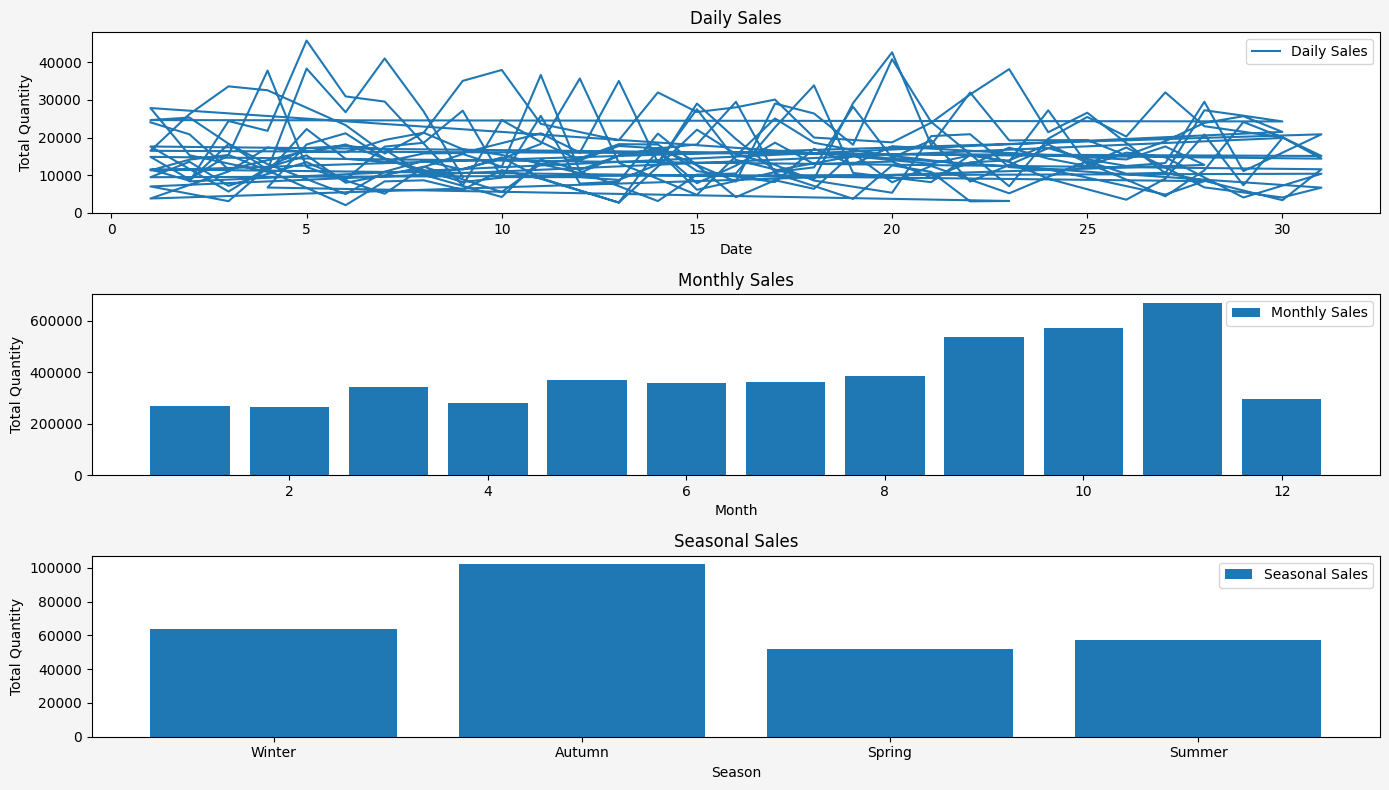

In [38]:

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_sales['day'], daily_sales['quantity'], label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Daily Sales')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(monthly_sales['month'], monthly_sales['quantity'], label='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Sales')
plt.legend()

plt.subplot(3, 1, 3)
plt.bar(seasonal_sales['season'], seasonal_sales['quantity'], label='Seasonal Sales')
plt.xlabel('Season')
plt.ylabel('Total Quantity')
plt.title('Seasonal Sales')
plt.legend()

plt.tight_layout()
plt.show()

## Summary of Peak Sales Periods

### Daily Sales Trends
The daily sales data shows that there are specific days with significantly higher sales. These peaks can be analyzed further to determine the reasons behind the spikes, such as holidays, promotions, or other events.

### Monthly Sales Trends
The monthly sales analysis indicates that:

- **Month 11, 2011**: Highest sales with a total quantity of 669915 items sold.
- **Month 12, 2011**: Lowest sales with a total quantity of 203836 items sold.

### Seasonal Sales Trends
The seasonal sales analysis reveals that:

- **Autumn**: Highest sales with a total quantity of 102124 items sold.
- **Winter**:  total quantity of 63787 items sold.
- **Summer**: Total quantity of 57054 items sold.
- **Spring**: Lowest sales with a Total quantity of 51878 items sold.

Understanding these peak periods can inform marketing strategies, inventory management, and sales forecasting, ensuring that the business can capitalize on high-demand periods and prepare adequately for low-demand periods.

***
***

## 2. How do sales trends vary across different countries?
To analyze how sales trends vary across different countries, we can aggregate the sales data by country.

- First, we need to group the data by country to calculate total sales and other relevant metrics for each country.

- Aggregate total quantity sold by country

In [39]:

country_sales = df.groupby('country')['quantity'].sum().reset_index()
country_sales.columns = ['Country', 'Total Quantity']
country_sales.sort_values(by='Total Quantity', ascending=False)


,Country,Total Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848
0,Australia,83653
31,Sweden,35637
32,Switzerland,29778
30,Spain,26824
19,Japan,25218


- Calculate the number of invoices per country

In [40]:

country_invoices = df.groupby('country')['invoiceno'].nunique().reset_index()
country_invoices.columns = ['Country', 'Number of Invoices']
country_invoices


,Country,Number of Invoices
0,Australia,69
1,Austria,19
2,Bahrain,2
3,Belgium,119
4,Brazil,1
5,Canada,6
6,Channel Islands,33
7,Cyprus,20
8,Czech Republic,5
9,Denmark,21


-  Calculate the average quantity sold per invoice for each country

In [41]:

country_avg_quantity = df.groupby('country')['quantity'].mean().reset_index()
country_avg_quantity.columns = ['Country', 'Avg_Quantity_per_Invoice']
country_avg_quantity.sort_values(by='Avg_Quantity_per_Invoice',ascending=False)


,Country,Avg_Quantity_per_Invoice
23,Netherlands,84.406580
31,Sweden,77.136364
19,Japan,70.441341
0,Australia,66.444003
29,Singapore,22.855895
9,Denmark,21.048843
8,Czech Republic,19.733333
21,Lithuania,18.628571
5,Canada,18.298013
10,EIRE,18.213627


- Merge the aggregated data

In [42]:

country_summary = country_sales.merge(country_invoices, on='Country')
country_summary = country_summary.merge(country_avg_quantity, on='Country')
country_summary


,Country,Total Quantity,Number of Invoices,Avg_Quantity_per_Invoice
0,Australia,83653,69,66.444003
1,Austria,4827,19,12.037406
2,Bahrain,260,2,15.294118
3,Belgium,23152,119,11.189947
4,Brazil,356,1,11.125000
5,Canada,2763,6,18.298013
6,Channel Islands,9479,33,12.505277
7,Cyprus,6317,20,10.155949
8,Czech Republic,592,5,19.733333
9,Denmark,8188,21,21.048843


In [43]:

country_sales = df.groupby('country').agg(Total_Quantity=('quantity', 'sum'),
                                          Total_Invoices=('invoiceno', 'nunique')).reset_index()

country_sales['Avg_Quantity_Per_Invoice'] = country_sales['Total_Quantity'] / country_sales['Total_Invoices']
country_sales.sort_values(by='Avg_Quantity_Per_Invoice',ascending=False)

,country,Total_Quantity,Total_Invoices,Avg_Quantity_Per_Invoice
23,Netherlands,200128,101,1981.465347
0,Australia,83653,69,1212.362319
19,Japan,25218,28,900.642857
31,Sweden,35637,46,774.717391
17,Israel,3990,6,665.000000
29,Singapore,5234,10,523.400000
24,Norway,19247,40,481.175000
5,Canada,2763,6,460.500000
10,EIRE,136329,319,427.363636
32,Switzerland,29778,71,419.408451


- Next, we need to determine how sales vary by season for each country. This requires grouping the data by country and season.

In [44]:

seasonal_sales = df.groupby(['country', 'season'])['quantity'].sum().reset_index()
seasonal_sales.sort_values(by='quantity', ascending=False).head(10)



,country,season,quantity
112,United Kingdom,Autumn,1476781
114,United Kingdom,Summer,874554
115,United Kingdom,Winter,840877
113,United Kingdom,Spring,816321
72,Netherlands,Autumn,63201
31,EIRE,Autumn,53600
75,Netherlands,Winter,51546
74,Netherlands,Summer,48849
41,France,Autumn,43230
45,Germany,Autumn,41586


- Total Sales by Country

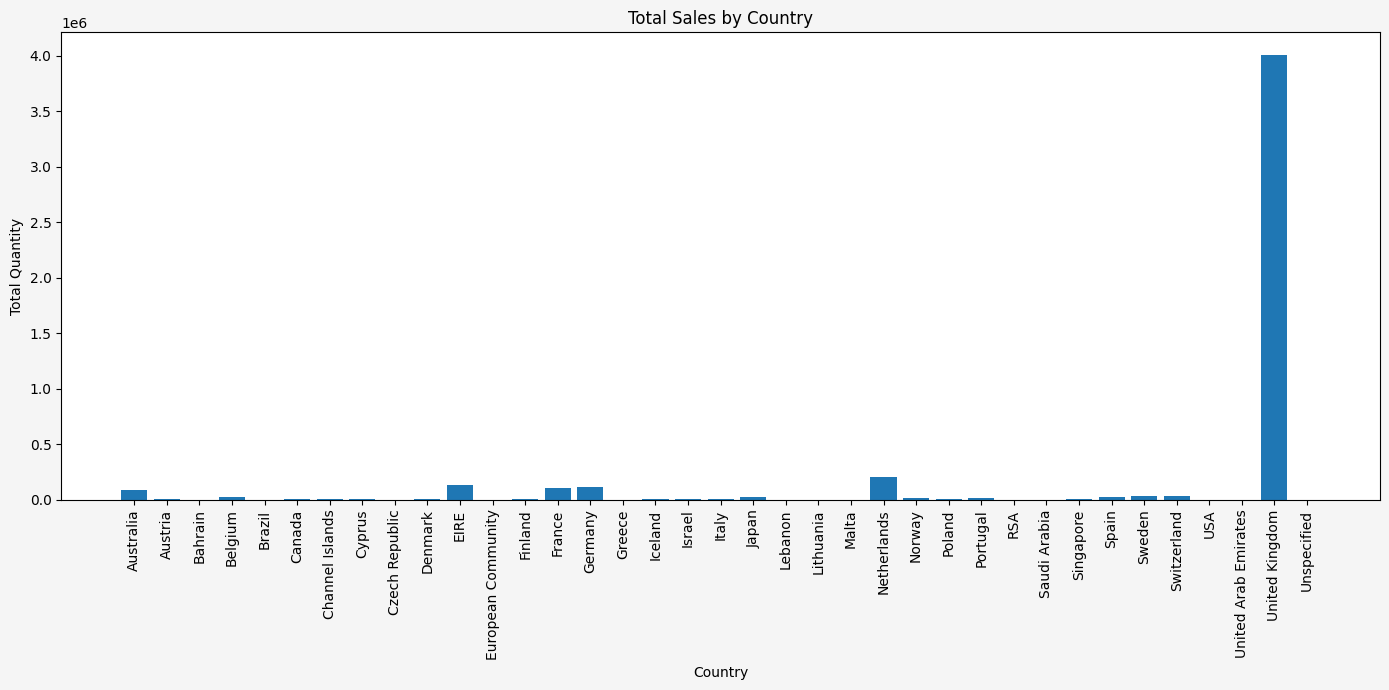

In [45]:

plt.figure(figsize=(14, 7))
plt.bar(country_sales['country'], country_sales['Total_Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Total Sales by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Average Quantity Sold per Invoice by Country

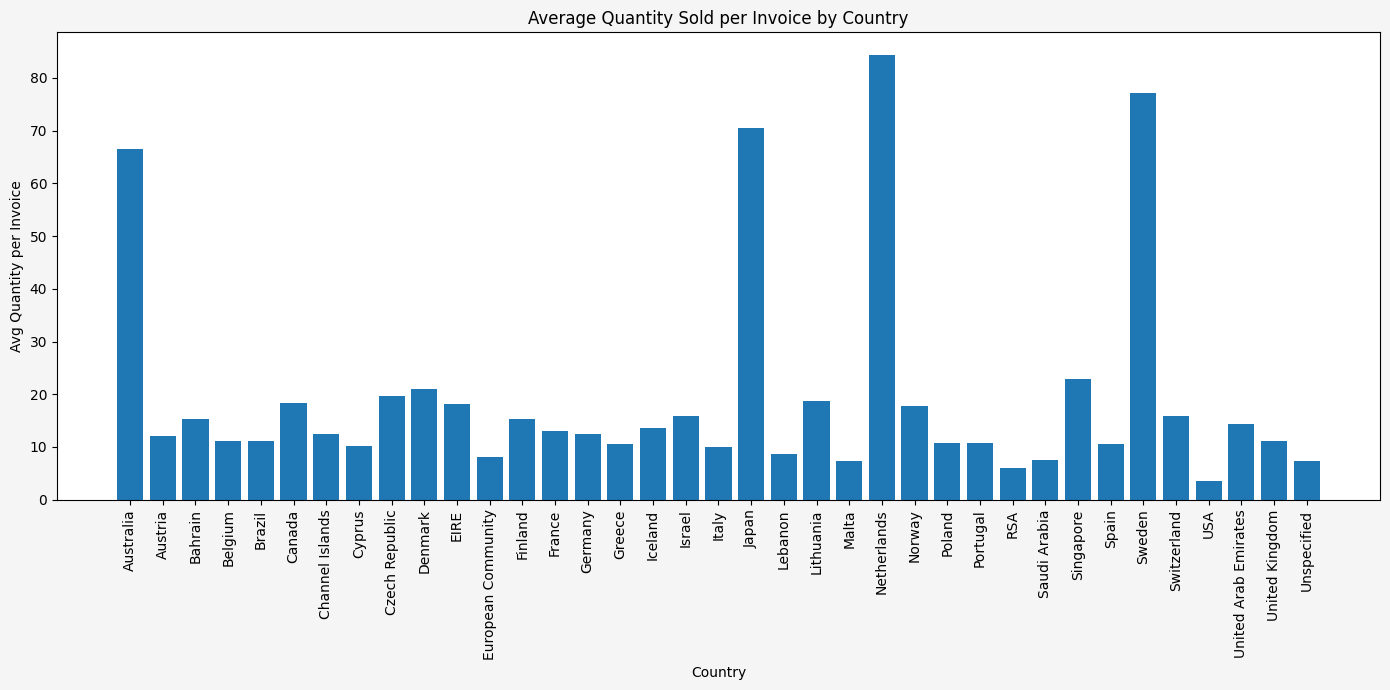

In [46]:

plt.figure(figsize=(14, 7))
plt.bar(country_avg_quantity['Country'], country_avg_quantity['Avg_Quantity_per_Invoice'])
plt.xlabel('Country')
plt.ylabel('Avg Quantity per Invoice')
plt.title('Average Quantity Sold per Invoice by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Seasonal Sales Trends by Country

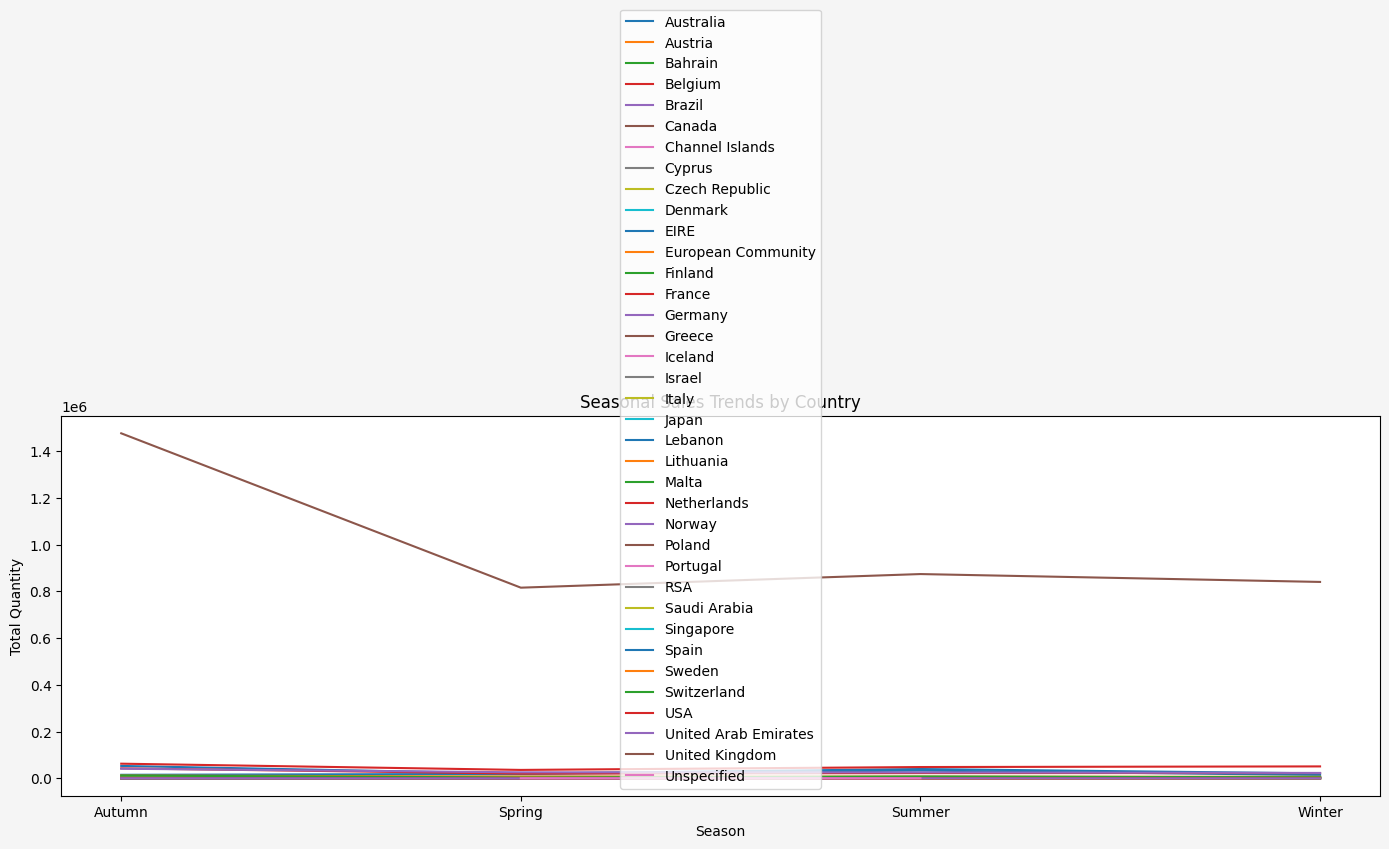

In [47]:

plt.figure(figsize=(14, 7))
for country in seasonal_sales['country'].unique():
    country_seasonal_data = seasonal_sales[seasonal_sales['country'] == country]
    plt.plot(country_seasonal_data['season'], country_seasonal_data['quantity'], label=country)

plt.xlabel('Season')
plt.ylabel('Total Quantity')
plt.title('Seasonal Sales Trends by Country')
plt.legend()
plt.tight_layout()
plt.show()


## Analysis of Sales Trends Across Different Countries

### Total Sales by Country
- **United Kingdom**: Leading with a total quantity of 4,008,533 items sold.
- **Netherlands**: Significant sales with 200,128 items sold.
- **EIRE (Ireland)**: Noteworthy with 136,329 items sold.

### Average Quantity Sold per Invoice by Country
- **Netherlands**: Highest average quantity per invoice at 1,981.47.
- **Australia**: High average quantity per invoice at 1,212.36.
- **Japan**: Strong average quantity per invoice at 900.64.

Understanding these sales trends across different countries helps in tailoring marketing strategies, managing inventory, and forecasting sales to meet the demands of each market effectively.


***
***

## 3. Which products are the bestsellers over different time periods?
To determine which products are the bestsellers over different time periods, we can aggregate the sales data by product and time period.

In [48]:

daily_sales = df.groupby(['description', 'invoicedate'])['quantity'].sum().reset_index()

monthly_sales = df.groupby(['description', 'month'])['quantity'].sum().reset_index()

seasonal_sales = df.groupby(['description', 'season'])['quantity'].sum().reset_index()


- Top 5 daily bestsellers products

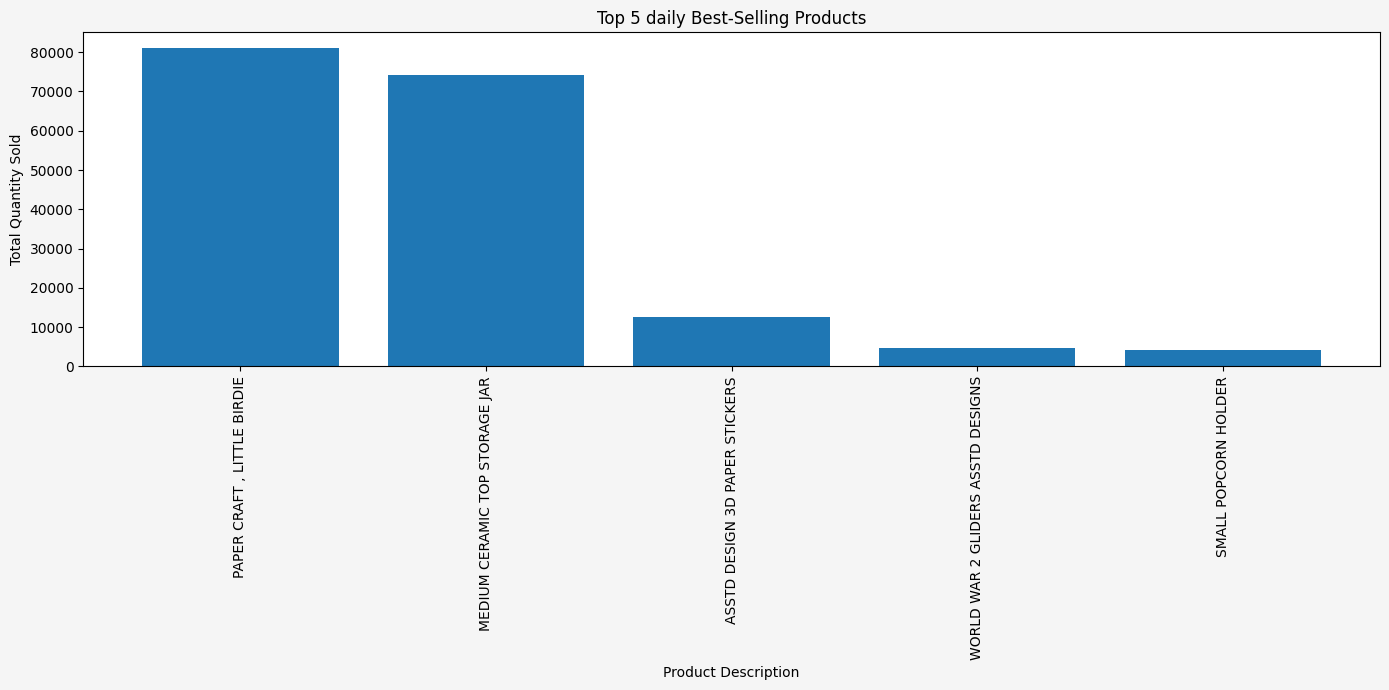

In [49]:

daily_bestsellers = daily_sales.sort_values(['invoicedate', 'quantity'], ascending=[True, False]).groupby('invoicedate').head()
daily_bestsellers = daily_bestsellers.sort_values(by='quantity',ascending=False).head()

plt.figure(figsize=(14, 7))
plt.bar(daily_bestsellers['description'], daily_bestsellers['quantity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 daily Best-Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Top 5 monthly bestsellers products

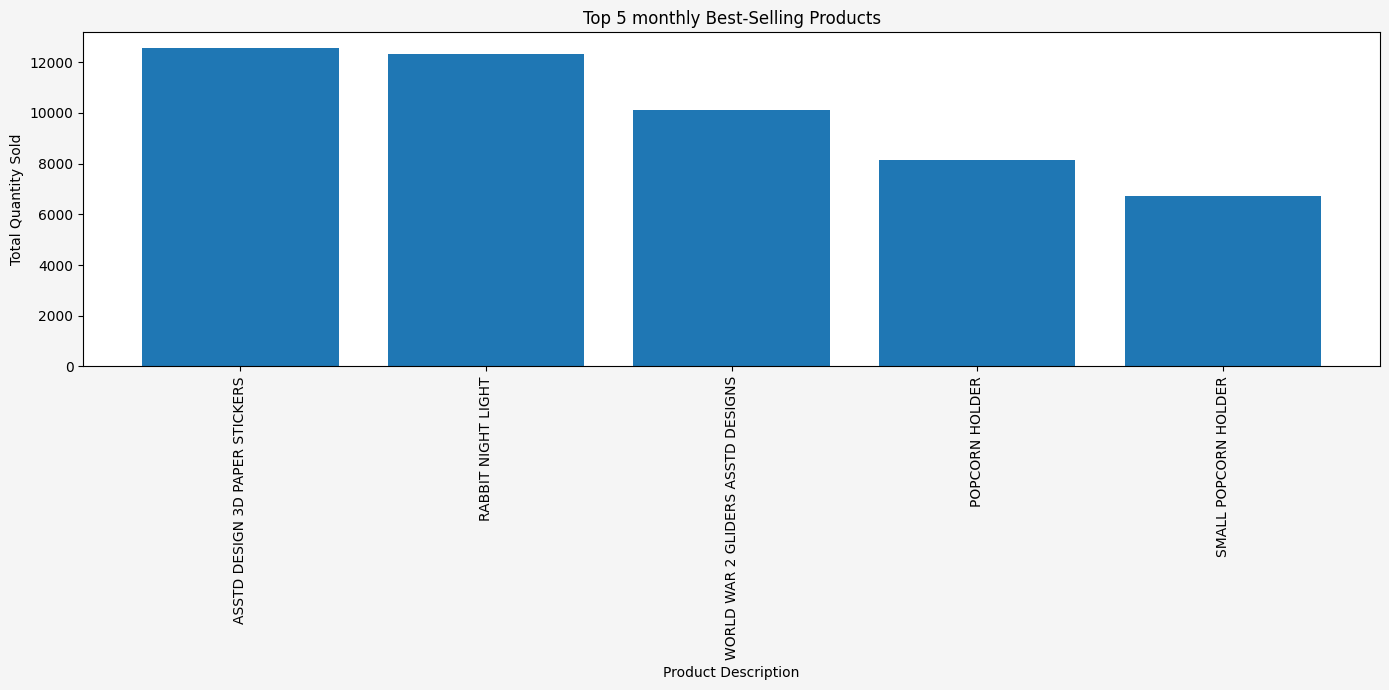

In [50]:

monthly_bestsellers = monthly_sales.sort_values(by=['quantity'], ascending=[ False])
monthly_bestsellers = monthly_bestsellers.sort_values(by='quantity',ascending=False).head(6)

plt.figure(figsize=(14, 7))
plt.bar(monthly_bestsellers['description'], monthly_bestsellers['quantity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 monthly Best-Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Top seasonal bestsellers products

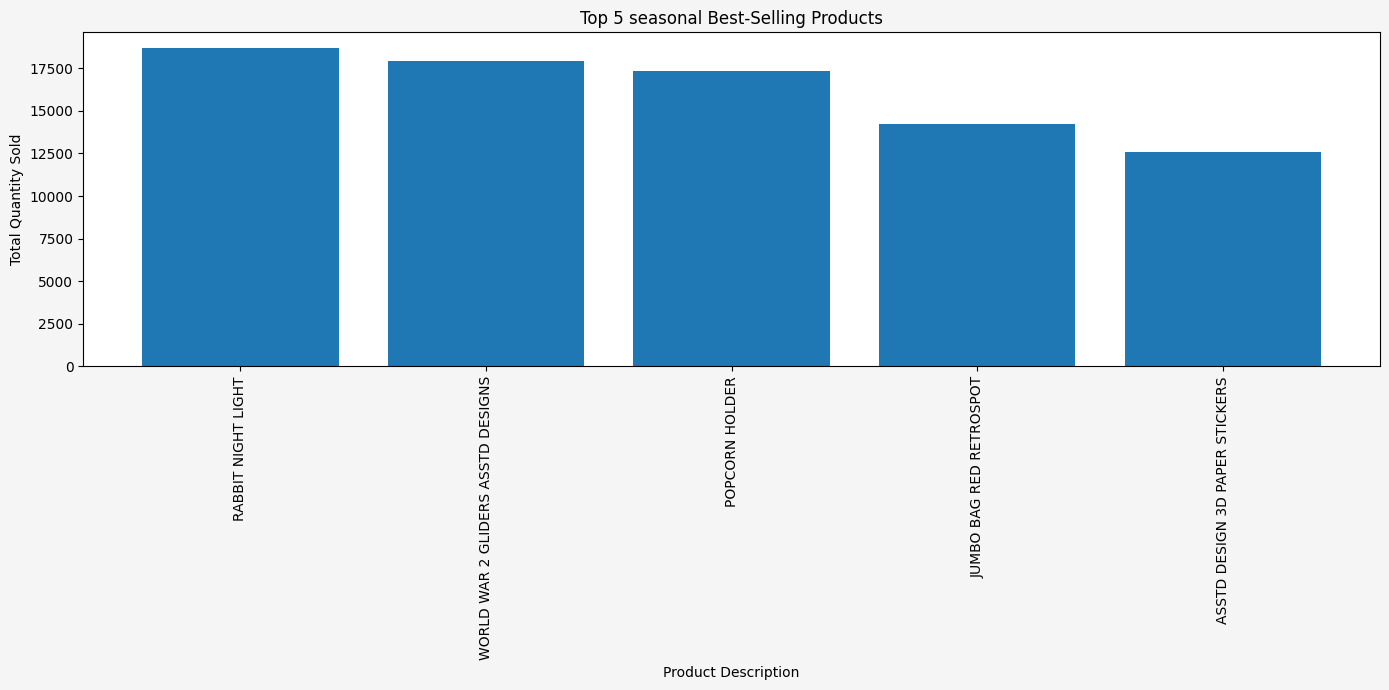

In [51]:

seasonal_bestsellers = seasonal_sales.sort_values(by= 'quantity', ascending=False)
seasonal_bestsellers  = seasonal_bestsellers.sort_values(by='quantity',ascending=False).head(6)

plt.figure(figsize=(14, 7))
plt.bar(seasonal_bestsellers['description'], seasonal_bestsellers['quantity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 seasonal Best-Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Plot top 10 best-selling products

In [52]:

product_sales = df.groupby(['description'])['quantity'].sum().reset_index()
product_sales.columns = ['Description', 'Total Quantity']
product_sales.sort_values(by='Total Quantity',ascending=False).head(10)


,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


In [53]:

product_sales = product_sales.sort_values(by='Total Quantity', ascending=False)
top_products = product_sales.head(10)
top_products

,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


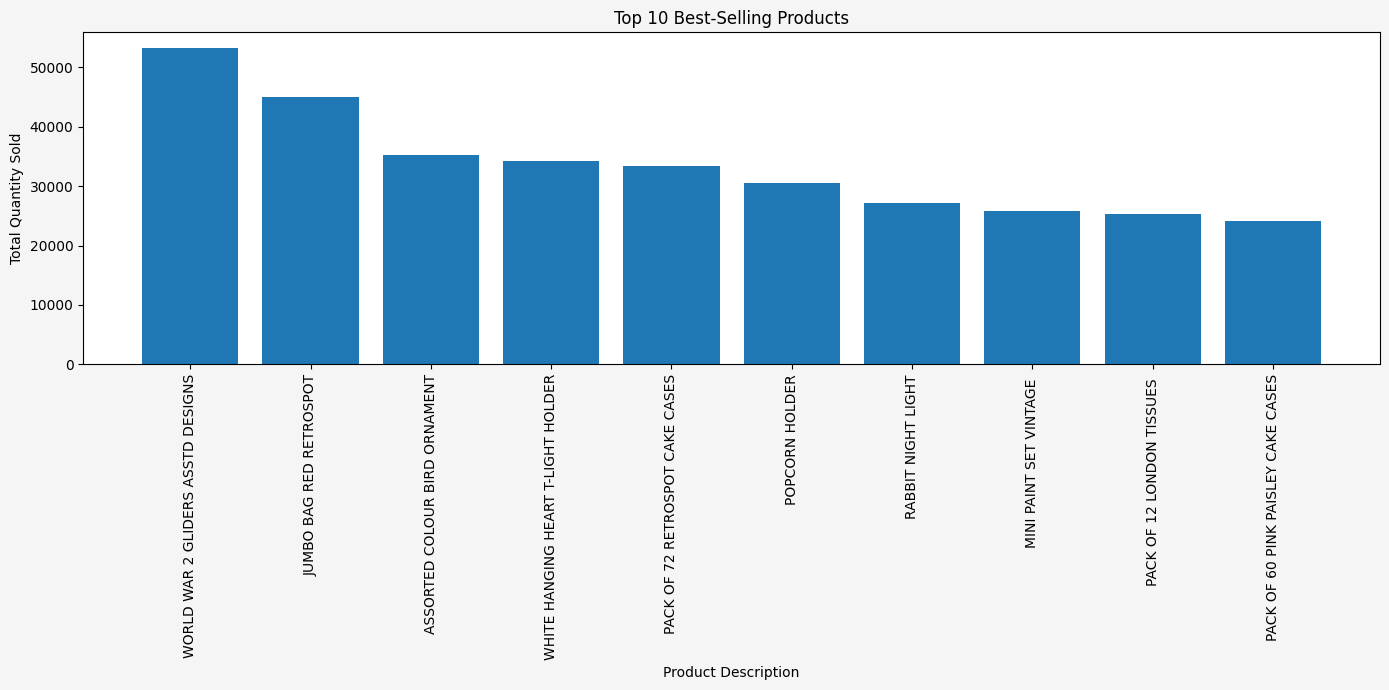

In [54]:

plt.figure(figsize=(14, 7))
plt.bar(top_products['Description'], top_products['Total Quantity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Bottom 10 underperforming products

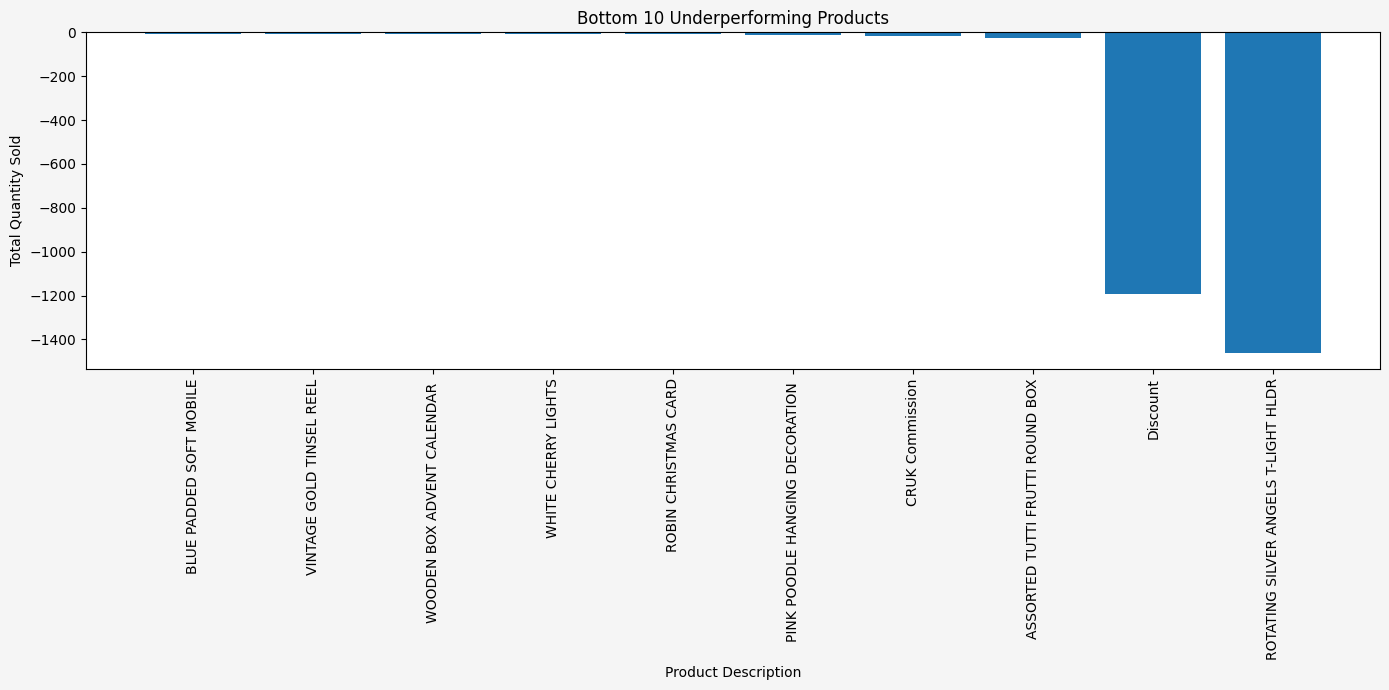

In [55]:

bottom_products = product_sales.tail(10)

plt.figure(figsize=(14, 7))
plt.bar(bottom_products['Description'], bottom_products['Total Quantity'])
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Bottom 10 Underperforming Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Sales Performance Evaluation

#### Best-Selling Products
- The top 10 best-selling products are visualized to identify items with the highest sales volumes.
- This helps in recognizing high-demand products and can guide inventory and marketing strategies.

#### Underperforming Products
- The bottom 10 underperforming products are visualized to identify items with the lowest sales volumes.
- This aids in decision-making regarding product discontinuation or re-evaluation of marketing efforts for these products.

#### Sales by Category
- If categories are defined, total sales by category are visualized to identify which product categories perform best.
- This provides insights into customer preferences and helps in optimizing the product portfolio.
***
***

## 4. Customer Behavior Analysis.
To perform a Customer Behavior Analysis, we'll focus on examining customer purchasing patterns, such as average order quantities and purchase frequency. This analysis will help identify key customer segments and enable the development of targeted marketing campaigns.

- Average Order Quantity per Customer

In [56]:

customer_orders = df.groupby('customerid').agg({"quantity":'sum','invoiceno': 'nunique'}).reset_index()
customer_orders.columns = ['CustomerID', 'Total Quantity', 'Order Frequency']
customer_orders


,CustomerID,Total Quantity,Order Frequency
0,12346,0,2
1,12347,2458,7
2,12348,2341,4
3,12349,631,1
4,12350,197,1
...,...,...,...
4367,18280,45,1
4368,18281,54,1
4369,18282,98,3
4370,18283,1397,16


In [57]:

customer_orders['Avg Quantity Per Order'] = customer_orders['Total Quantity'] / customer_orders['Order Frequency']
customer_orders


,CustomerID,Total Quantity,Order Frequency,Avg Quantity Per Order
0,12346,0,2,0.000000
1,12347,2458,7,351.142857
2,12348,2341,4,585.250000
3,12349,631,1,631.000000
4,12350,197,1,197.000000
...,...,...,...,...
4367,18280,45,1,45.000000
4368,18281,54,1,54.000000
4369,18282,98,3,32.666667
4370,18283,1397,16,87.312500


In [58]:

customer_orders = customer_orders.sort_values(by='Avg Quantity Per Order', ascending=False)
customer_orders


,CustomerID,Total Quantity,Order Frequency,Avg Quantity Per Order
692,13256,12540,1,12540.0
4347,18251,7824,1,7824.0
603,13135,4300,1,4300.0
3256,16754,4280,1,4280.0
282,12688,3028,1,3028.0
...,...,...,...,...
3103,16546,-303,3,-101.0
2578,15823,-283,2,-141.5
3650,17307,-144,1,-144.0
2892,16252,-158,1,-158.0


In [59]:

top_customers_avg_quantity = customer_orders.head(10)


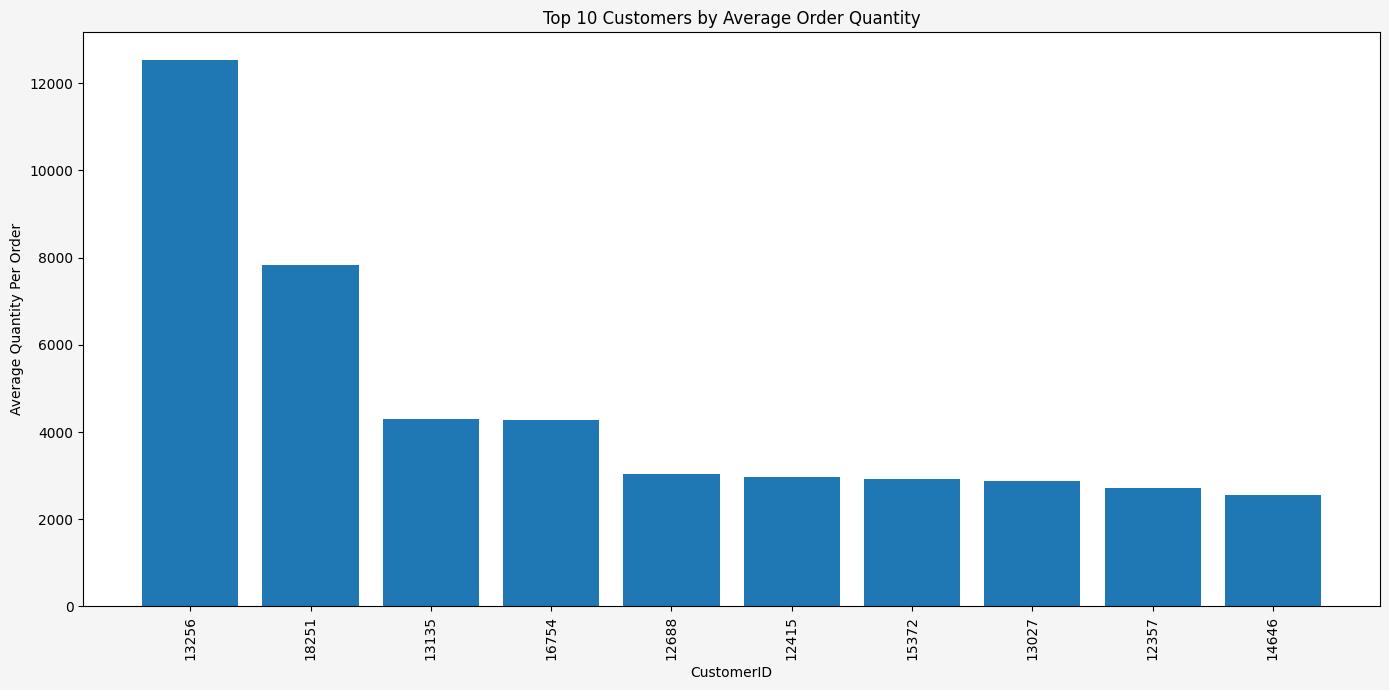

In [60]:

plt.figure(figsize=(14, 7))
plt.bar(top_customers_avg_quantity['CustomerID'].astype(str), top_customers_avg_quantity['Avg Quantity Per Order'])
plt.xlabel('CustomerID')
plt.ylabel('Average Quantity Per Order')
plt.title('Top 10 Customers by Average Order Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Frequency of Purchases

In [61]:

customer_orders = customer_orders.sort_values(by='Order Frequency', ascending=False)
top_customers_frequency = customer_orders.head(10)


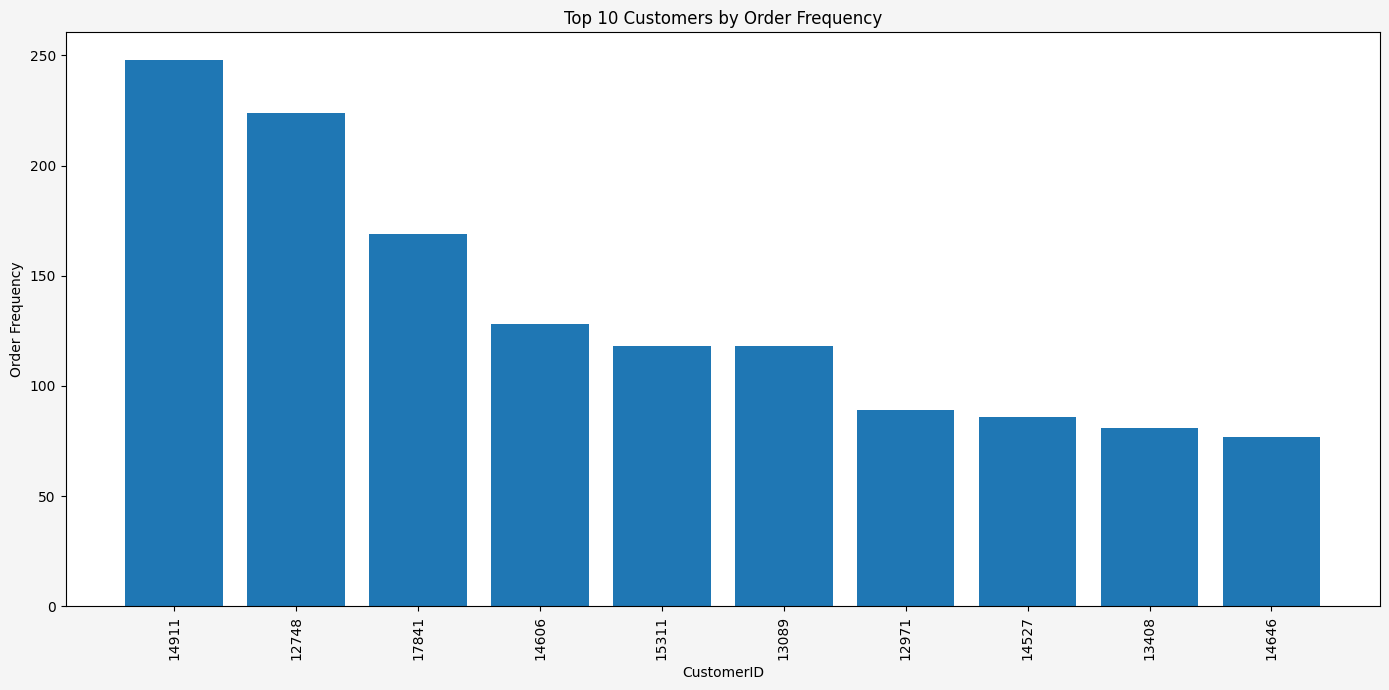

In [62]:


plt.figure(figsize=(14, 7))
plt.bar(top_customers_frequency['CustomerID'].astype(str), top_customers_frequency['Order Frequency'])
plt.xlabel('CustomerID')
plt.ylabel('Order Frequency')
plt.title('Top 10 Customers by Order Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Key Customer Segments

- segments based on average quantity per order

In [63]:

high_avg_quantity_customers = customer_orders[customer_orders['Avg Quantity Per Order'] > customer_orders['Avg Quantity Per Order'].quantile(0.75)]
low_avg_quantity_customers = customer_orders[customer_orders['Avg Quantity Per Order'] <= customer_orders['Avg Quantity Per Order'].quantile(0.25)]


- segments based on order frequency

In [64]:

high_frequency_customers = customer_orders[customer_orders['Order Frequency'] > customer_orders['Order Frequency'].quantile(0.75)]
low_frequency_customers = customer_orders[customer_orders['Order Frequency'] <= customer_orders['Order Frequency'].quantile(0.25)]


- high average quantity customers

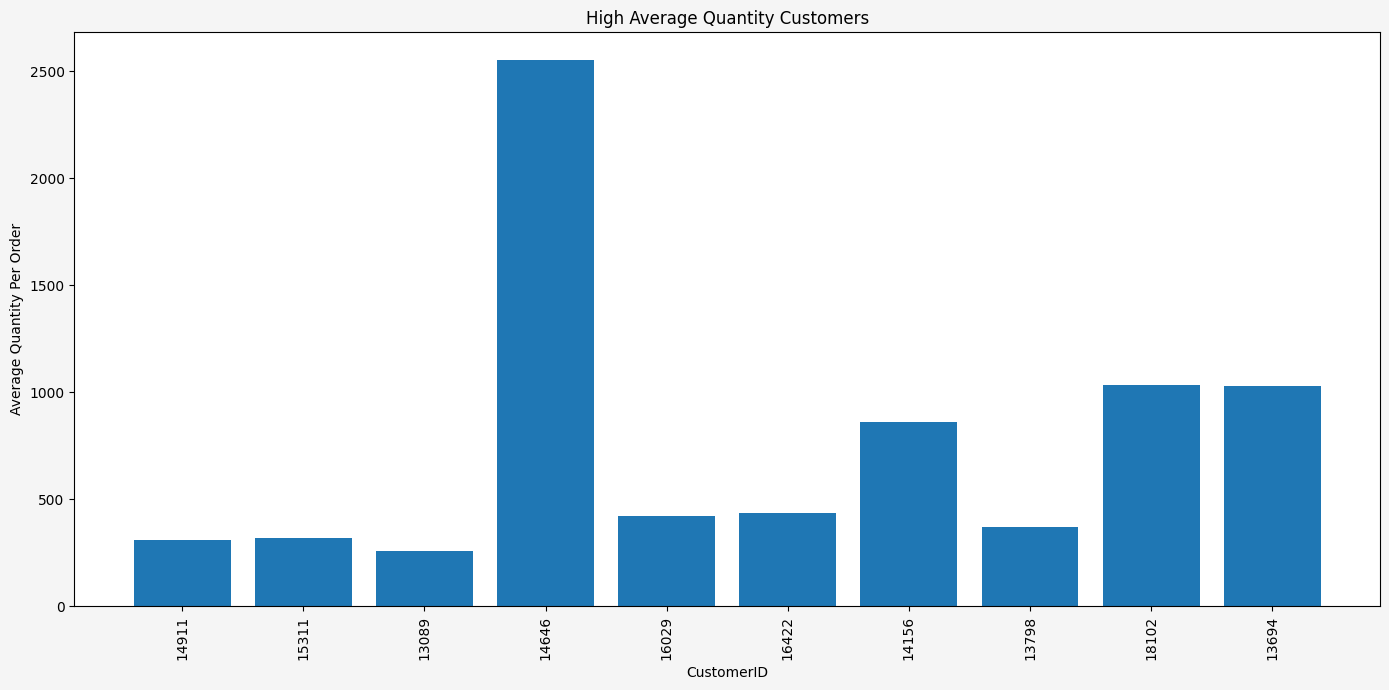

In [65]:

plt.figure(figsize=(14, 7))
plt.bar(high_avg_quantity_customers['CustomerID'].head(10).astype(str), high_avg_quantity_customers['Avg Quantity Per Order'].head(10))
plt.xlabel('CustomerID')
plt.ylabel('Average Quantity Per Order')
plt.title('High Average Quantity Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- high frequency customers

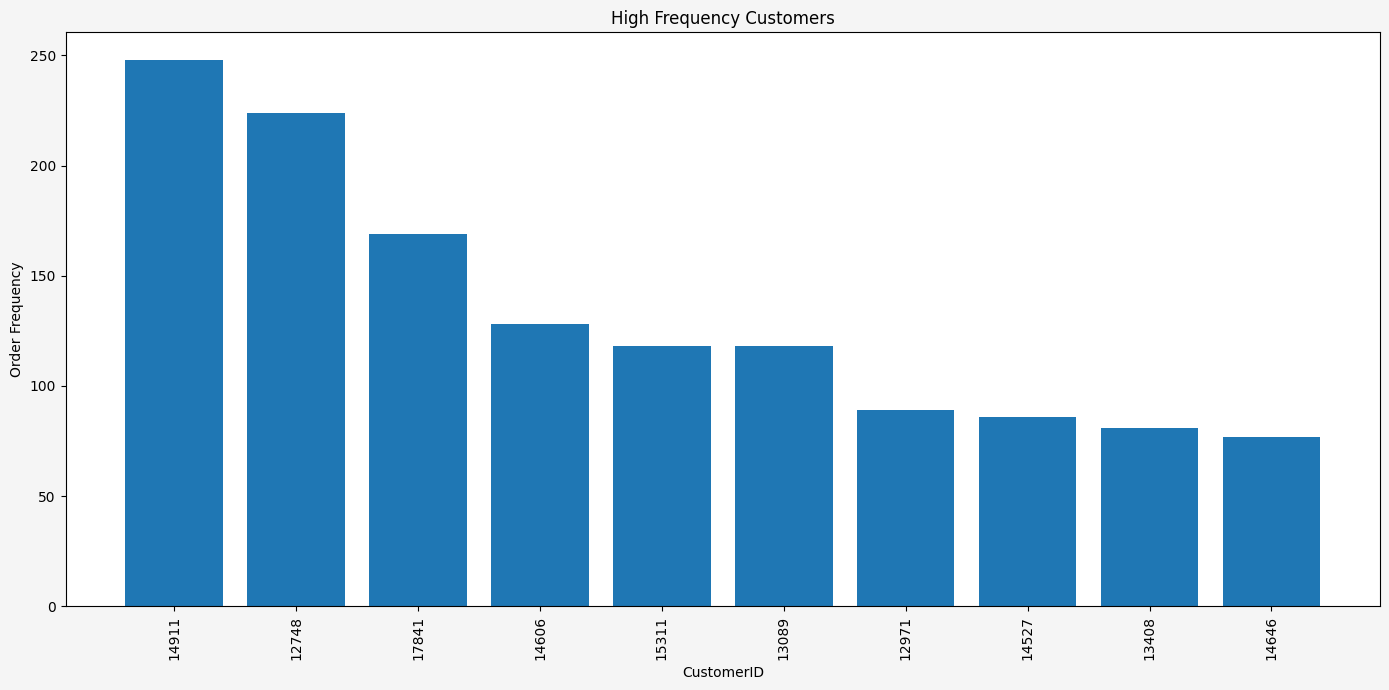

In [66]:

plt.figure(figsize=(14, 7))
plt.bar(high_frequency_customers['CustomerID'].head(10).astype(str), high_frequency_customers['Order Frequency'].head(10))
plt.xlabel('CustomerID')
plt.ylabel('Order Frequency')
plt.title('High Frequency Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Customer Behavior Analysis

#### Average Order Quantity per Customer
- Calculated the average quantity of items ordered by each customer.
- Visualized the top 10 customers by average order quantity to identify key customers with high average orders.

#### Frequency of Purchases
- Calculated the order frequency for each customer.
- Visualized the top 10 customers by order frequency to identify key customers with high purchase frequency.

#### Key Customer Segments
- Identified high and low average quantity customers based on the top and bottom quartiles.
- Identified high and low frequency customers based on the top and bottom quartiles.
- Visualized high average quantity and high frequency customer segments to better understand customer purchasing behavior.

This analysis provides insights into customer purchasing patterns, helping to identify key customer segments. These insights can be used to develop targeted marketing campaigns and improve customer engagement and retention strategies.


***
***